In [1]:
!pip install statsmodels
!pip install regex
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import regex as re 
from datetime import datetime 
import scipy as sp
import statsmodels.api as sm
df = pd.read_csv('com_prices.csv')
df.head()

/tmp/ipykernel_1470/492332740.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [2]:
#use regex to tranform month column to month/year format


def monthyear(column):
    return re.sub(r'(\d{4})M(\d{2})', r'\2/\1', column)

df['MONTH'] = df['MONTH'].apply(monthyear)
df['MONTH'] = pd.to_datetime(df['MONTH'], format = '%m/%Y')
df.head()

,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960-01-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960-02-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960-03-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960-04-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960-05-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


<Axes: xlabel='MONTH', ylabel='GOLD'>

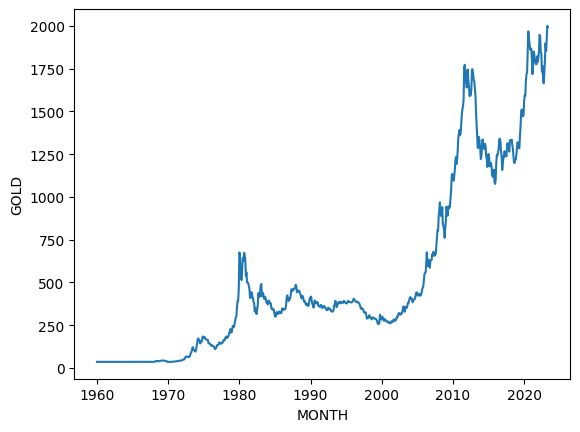

In [4]:
sns.lineplot(data = df, x = 'MONTH', y = 'GOLD')

<Axes: xlabel='MONTH', ylabel='GOLD'>

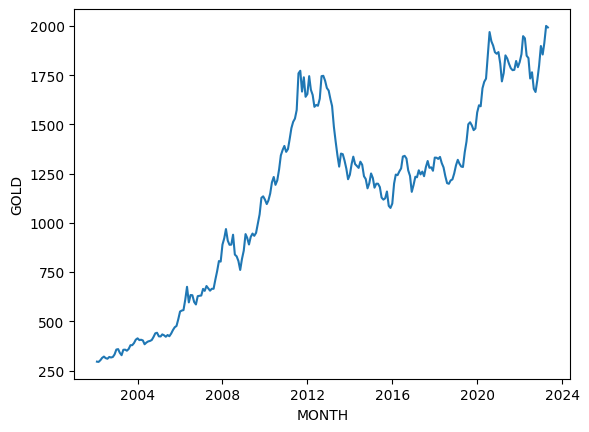

In [6]:
sns.lineplot(data = df[df['MONTH'] > '01-01-2002'], x = 'MONTH', y = 'GOLD') 

In [7]:
df.columns

Index(['MONTH', 'CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS',
       'COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],
      dtype='

In [8]:
energy = ['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COFFEE_ARABIC']

caffeine = ['COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'TOBAC_US']

oils = ['COCONUT_OIL', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL','SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL']

grains = ['COCOA', 'GRNUT', 'SOYBEANS','BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW' ]

food = ['BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD']

industrial = ['LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG']

metals = ['PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'] 

ecorr = df[energy].corr()
ccorr = df[caffeine].corr()
ocorr = df[oils].corr()
gcorr = df[grains].corr()
fcorr = df[food].corr()
icorr = df[industrial].corr()
mcorr = df[metals].corr()



ValueError: could not convert string to float: '…'

In [13]:
df['CRUDE_WTI']

0          …
1          …
2          …
3          …
4          …
       ...  
756    78.11
757    76.84
758    73.37
759    79.44
760    71.59
Name: CRUDE_WTI, Length: 761, dtype: object

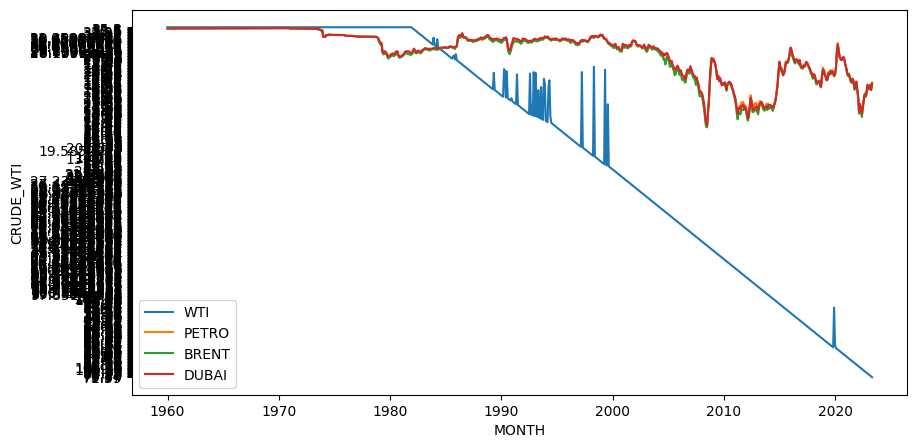

In [29]:
plt.figure(figsize=(10,5))
limited_time = df[df['MONTH'] > '01-01-2022']
df_sorted_wti = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_WTI')
df_sorted_petro = limited_time[limited_time['MONTH'] >= '01-01-2023'].sort_values(by='CRUDE_PETRO')
df_sorted_brent = limited_time[limited_time['MONTH'] >= '01-01-2023'].sort_values(by='CRUDE_BRENT')

sns.lineplot(data = df_sorted, x = 'MONTH', y = 'CRUDE_WTI', label = 'WTI') 
sns.lineplot(data = df_sorted, x = 'MONTH', y = 'CRUDE_PETRO', label = 'PETRO')
sns.lineplot(data = df_sorted, x = 'MONTH', y = 'CRUDE_BRENT', label = 'BRENT')
sns.lineplot(data = df_sorted, x = 'MONTH', y = 'CRUDE_DUBAI', label = 'DUBAI')
plt.show()

In [ ]:
df1 = df.copy()
df1.drop('MONTH', axis = 1, inplace = True)
df1.head()